# THDM-II Loop Versus Tree-Level Cut-off
## Settings:

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import scipy


plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
font = {'size' : 12}
plt.rc('font', **font)
# n = 0.6
# plt.rcParams['figure.figsize'] = 8.*n, 6.*n
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
matplotlib.rcParams['axes.titlesize'] = 'medium'
matplotlib.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'

matplotlib.rcParams['axes.color_cycle'] = [u'#E24A33', u'#348ABD', u'#988ED5', u'#777777', u'#FBC15E', u'#8EBA42', u'#FFB5B8']
default_colours = ['black',u'#E24A33', u'#348ABD', u'#988ED5', u'#777777', u'#FBC15E', u'#8EBA42', u'#FFB5B8']

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Import and process data:

In [1]:
import json
import numpy as np

with open('./../SlimData/THDMII/Loop_250.json', 'rb') as f:
    Data_250_loop_points = np.array(json.load(f))
f.close()
with open('./../SlimData/THDMII/Loop_500.json', 'rb') as f:
    Data_500_loop_points = np.array(json.load(f))
f.close()
with open('./../SlimData/THDMII/Loop_750.json', 'rb') as f:
    Data_750_loop_points = np.array(json.load(f))
f.close()

with open('./../SlimData/THDMII/Tree_250.json', 'rb') as f:
    Data_250_tree_points = np.array(json.load(f))
f.close()
with open('./../SlimData/THDMII/Tree_500.json', 'rb') as f:
    Data_500_tree_points = np.array(json.load(f))
f.close()
with open('./../SlimData/THDMII/Tree_750.json', 'rb') as f:
    Data_750_tree_points = np.array(json.load(f))
f.close()


with open('./../SlimData/THDMII/Loop_250_LTB.json', 'rb') as f:
    Data_250_LTB_loop_points = np.array(json.load(f))
f.close()
with open('./../SlimData/THDMII/Loop_500_LTB.json', 'rb') as f:
    Data_500_LTB_loop_points = np.array(json.load(f))
f.close()

In [2]:
Data_250_loop_points_allowed = np.extract([x['VACUUM'] > 0.5 and x['HIGGSBOUNDS'] > 0.5 for x in Data_250_loop_points],Data_250_loop_points)
Data_500_loop_points_allowed = np.extract([x['VACUUM'] > 0.5 and x['HIGGSBOUNDS'] > 0.5 for x in Data_500_loop_points],Data_500_loop_points)
Data_750_loop_points_allowed = np.extract([x['VACUUM'] > 0.5 and x['HIGGSBOUNDS'] > 0.5 for x in Data_750_loop_points],Data_750_loop_points)

Data_250_tree_points_allowed = np.extract([x['HIGGSBOUNDS'] > 0.5 for x in Data_250_tree_points],Data_250_tree_points)
Data_500_tree_points_allowed = np.extract([x['HIGGSBOUNDS'] > 0.5 for x in Data_500_tree_points],Data_500_tree_points)
Data_750_tree_points_allowed = np.extract([x['HIGGSBOUNDS'] > 0.5 for x in Data_750_tree_points],Data_750_tree_points)

Data_250_LTB_loop_points_allowed = np.extract([x['VACUUM'] > 0.5 and x['HIGGSBOUNDS'] > 0.5 for x in Data_250_LTB_loop_points],Data_250_LTB_loop_points)
Data_500_LTB_loop_points_allowed = np.extract([x['VACUUM'] > 0.5 and x['HIGGSBOUNDS'] > 0.5 for x in Data_500_LTB_loop_points],Data_500_LTB_loop_points)

In [3]:
print '250 tree Data'
print 'original num', len(Data_250_tree_points)
print 'vac & HB cut', len(Data_250_tree_points_allowed)

print '500 tree Data'
print 'original num', len(Data_500_tree_points)
print 'vac & HB cut', len(Data_500_tree_points_allowed)

print '750 tree Data'
print 'original num', len(Data_750_tree_points)
print 'vac & HB cut', len(Data_750_tree_points_allowed)

print ' '

print '250 loop Data'
print 'original num', len(Data_250_loop_points)
print 'vac & HB cut', len(Data_250_loop_points_allowed)

print '500 loop Data'
print 'original num', len(Data_500_loop_points)
print 'vac & HB cut', len(Data_500_loop_points_allowed)

print '750 loop Data'
print 'original num', len(Data_750_loop_points)
print 'vac & HB cut', len(Data_750_loop_points_allowed)

print ' '

print '250 large tanbeta loop Data'
print 'original num', len(Data_250_LTB_loop_points)
print 'vac & HB cut', len(Data_250_LTB_loop_points_allowed)

print '500 large tanbeta loop Data'
print 'original num', len(Data_500_LTB_loop_points)
print 'vac & HB cut', len(Data_500_LTB_loop_points_allowed)

250 tree Data
original num 96816
vac & HB cut 71620
500 tree Data
original num 136483
vac & HB cut 94856
750 tree Data
original num 132353
vac & HB cut 115417
 
250 loop Data
original num 109265
vac & HB cut 16745
500 loop Data
original num 51010
vac & HB cut 11735
750 loop Data
original num 58688
vac & HB cut 39441
 
250 large tanbeta loop Data
original num 97512
vac & HB cut 16189
500 large tanbeta loop Data
original num 78373
vac & HB cut 22998


In [4]:
def MA(key,data) :
    return np.array([x[key] for x in data])

## Figures: 

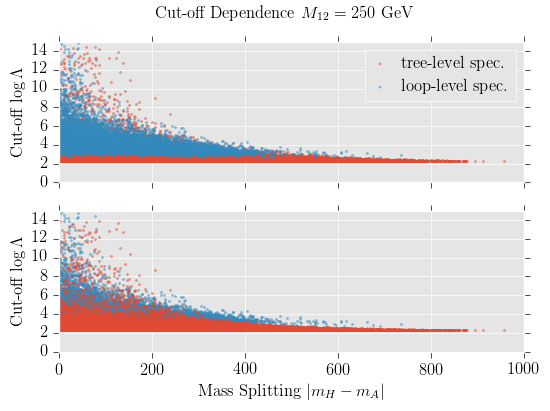

In [28]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=250$ GeV')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_250_tree_points_allowed)-MA('MASS[36]',Data_250_tree_points_allowed)),MA('CUTOFF[2]',Data_250_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5, label=r'tree-level spec.')
ax[0].scatter(np.abs(MA('MASS[35]',Data_250_loop_points_allowed)-MA('MASS[36]',Data_250_loop_points_allowed)),MA('CUTOFF[2]',Data_250_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5, label=r'loop-level spec.')

ax[1].scatter(np.abs(MA('MASS[35]',Data_250_loop_points_allowed)-MA('MASS[36]',Data_250_loop_points_allowed)),MA('CUTOFF[2]',Data_250_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_250_tree_points_allowed)-MA('MASS[36]',Data_250_tree_points_allowed)),MA('CUTOFF[1]',Data_250_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)

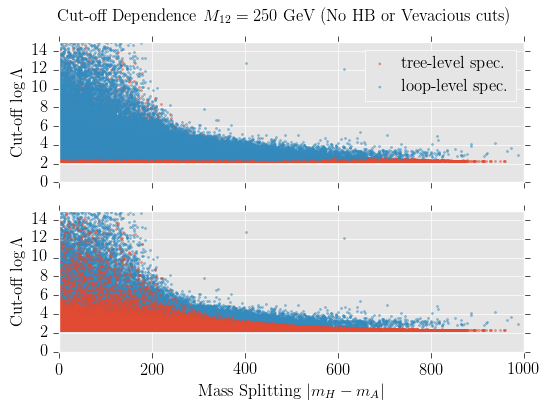

In [27]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=250$ GeV (No HB or Vevacious cuts)')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_250_tree_points)-MA('MASS[36]',Data_250_tree_points)),MA('CUTOFF[2]',Data_250_tree_points),color=default_colours[1], s=2., alpha=0.5, label=r'tree-level spec.')
ax[0].scatter(np.abs(MA('MASS[35]',Data_250_loop_points)-MA('MASS[36]',Data_250_loop_points)),MA('CUTOFF[2]',Data_250_loop_points),color=default_colours[2], s=2., alpha=0.5, label=r'loop-level spec.')

ax[1].scatter(np.abs(MA('MASS[35]',Data_250_loop_points)-MA('MASS[36]',Data_250_loop_points)),MA('CUTOFF[2]',Data_250_loop_points),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_250_tree_points)-MA('MASS[36]',Data_250_tree_points)),MA('CUTOFF[1]',Data_250_tree_points),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)

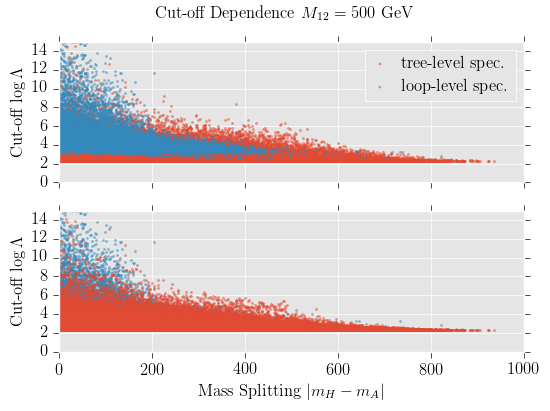

In [26]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=500$ GeV')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_500_tree_points_allowed)-MA('MASS[36]',Data_500_tree_points_allowed)),MA('CUTOFF[2]',Data_500_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5, label=r'tree-level spec.')
ax[0].scatter(np.abs(MA('MASS[35]',Data_500_loop_points_allowed)-MA('MASS[36]',Data_500_loop_points_allowed)),MA('CUTOFF[2]',Data_500_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5, label=r'loop-level spec.')

ax[1].scatter(np.abs(MA('MASS[35]',Data_500_loop_points_allowed)-MA('MASS[36]',Data_500_loop_points_allowed)),MA('CUTOFF[2]',Data_500_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_500_tree_points_allowed)-MA('MASS[36]',Data_500_tree_points_allowed)),MA('CUTOFF[1]',Data_500_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)

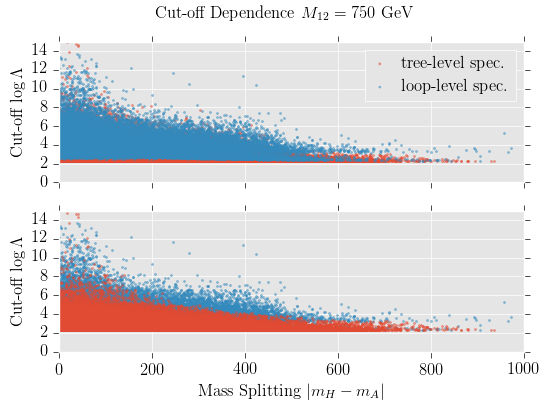

In [25]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=750$ GeV')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_750_tree_points_allowed)-MA('MASS[36]',Data_750_tree_points_allowed)),MA('CUTOFF[2]',Data_750_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5, label=r'tree-level spec.')
ax[0].scatter(np.abs(MA('MASS[35]',Data_750_loop_points_allowed)-MA('MASS[36]',Data_750_loop_points_allowed)),MA('CUTOFF[2]',Data_750_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5, label=r'loop-level spec.')

ax[1].scatter(np.abs(MA('MASS[35]',Data_750_loop_points_allowed)-MA('MASS[36]',Data_750_loop_points_allowed)),MA('CUTOFF[2]',Data_750_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_750_tree_points_allowed)-MA('MASS[36]',Data_750_tree_points_allowed)),MA('CUTOFF[1]',Data_750_tree_points_allowed),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)

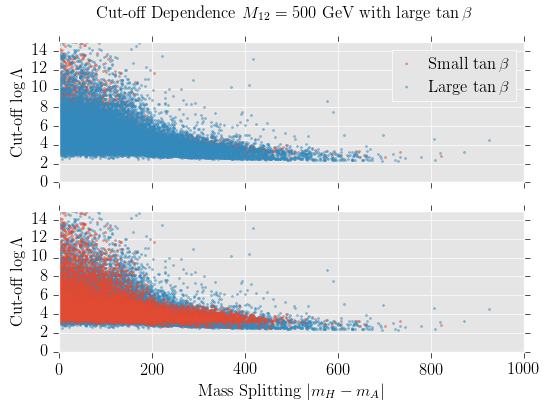

In [24]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=500$ GeV with large $\tan\beta$')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_500_loop_points_allowed)-MA('MASS[36]',Data_500_loop_points_allowed)),MA('CUTOFF[2]',Data_500_loop_points_allowed),color=default_colours[1], s=2., alpha=0.5, label=r'Small $\tan\beta$')
ax[0].scatter(np.abs(MA('MASS[35]',Data_500_LTB_loop_points_allowed)-MA('MASS[36]',Data_500_LTB_loop_points_allowed)),MA('CUTOFF[2]',Data_500_LTB_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5, label=r'Large $\tan\beta$')

ax[1].scatter(np.abs(MA('MASS[35]',Data_500_LTB_loop_points_allowed)-MA('MASS[36]',Data_500_LTB_loop_points_allowed)),MA('CUTOFF[2]',Data_500_LTB_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_500_loop_points_allowed)-MA('MASS[36]',Data_500_loop_points_allowed)),MA('CUTOFF[2]',Data_500_loop_points_allowed),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)

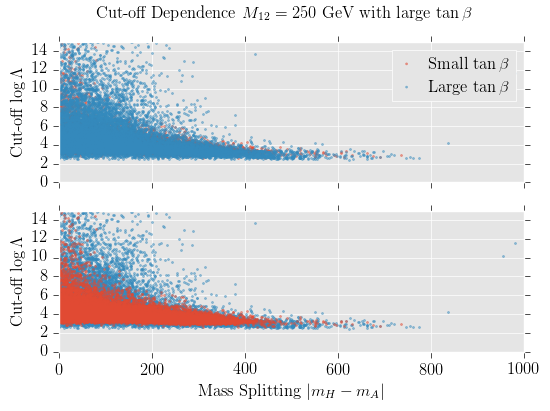

In [23]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle(r'Cut-off Dependence $M_{12}=250$ GeV with large $\tan\beta$')
ax[1].set_xlabel(r'Mass Splitting $|m_{H}-m_{A}|$')

for ax_ob in ax :
    ax_ob.set_ylabel(r'Cut-off $\log\Lambda$')
    ax_ob.set_xlim(0.,1000.)
    ax_ob.set_ylim(0.,15.)

ax[0].scatter(np.abs(MA('MASS[35]',Data_250_loop_points_allowed)-MA('MASS[36]',Data_250_loop_points_allowed)),MA('CUTOFF[2]',Data_250_loop_points_allowed),color=default_colours[1], s=2., alpha=0.5, label=r'Small $\tan\beta$')
ax[0].scatter(np.abs(MA('MASS[35]',Data_250_LTB_loop_points_allowed)-MA('MASS[36]',Data_250_LTB_loop_points_allowed)),MA('CUTOFF[2]',Data_250_LTB_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5, label=r'Large $\tan\beta$')

ax[1].scatter(np.abs(MA('MASS[35]',Data_250_LTB_loop_points_allowed)-MA('MASS[36]',Data_250_LTB_loop_points_allowed)),MA('CUTOFF[2]',Data_250_LTB_loop_points_allowed),color=default_colours[2], s=2., alpha=0.5)
ax[1].scatter(np.abs(MA('MASS[35]',Data_250_loop_points_allowed)-MA('MASS[36]',Data_250_loop_points_allowed)),MA('CUTOFF[2]',Data_250_loop_points_allowed),color=default_colours[1], s=2., alpha=0.5)

ax[0].legend(prop={'size':12}, handlelength=1.0, scatterpoints = 1)